# Loads a 3D data cube in binary format

Little endian float, 4 bytes : '<f4'
Assumes the file is a 3D array of size n1, n2, n3

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def load_file( file, n1, n2, n3, data_format ):
    data = np.fromfile(file, dtype=data_format)
    data = np.reshape( data, (n1,n2,n3), order='F')
    size = n1 * n2 * n3
    return data, size



In [101]:
data, size = load_file( "D:\Data\CaseStudies\Volve\Seismic\sx.dat", 828, 530, 340, '<f4' )
data.shape

(828, 530, 340)

In [102]:

data

array([[[-6.83537722e-01, -5.65924227e-01, -3.65121365e-01, ...,
          6.25544310e-01,  1.17650032e-01,  3.69079486e-02],
        [-5.22325754e-01, -4.62848306e-01, -3.91618073e-01, ...,
          6.86241031e-01,  4.82204139e-01,  3.52343082e-01],
        [-3.18834126e-01, -3.33651304e-01, -4.12531793e-01, ...,
          5.44474602e-01,  3.85420024e-01,  3.60973895e-01],
        ...,
        [ 1.93543816e+00,  2.15100479e+00,  2.23131847e+00, ...,
          3.06570709e-01,  1.55657411e-01, -2.22463489e-01],
        [ 1.64229107e+00,  1.83818436e+00,  1.89441776e+00, ...,
         -5.99657632e-02, -4.40224469e-01, -5.66030383e-01],
        [ 1.41307545e+00,  1.60132122e+00,  1.62703705e+00, ...,
         -4.62374628e-01, -6.08065009e-01, -7.48804092e-01]],

       [[ 6.61012471e-01,  9.12687182e-01,  1.10462666e+00, ...,
          5.22386074e-01,  3.48743737e-01,  9.38953161e-02],
        [ 1.49556923e+00,  1.52497005e+00,  1.40615177e+00, ...,
          7.10835099e-01,  6.76353097e

Some visualization 


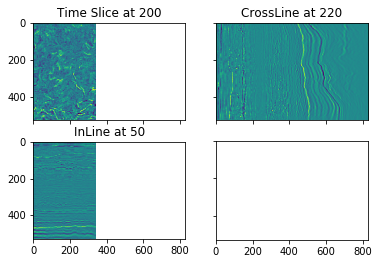

In [137]:

def plot_slices(data, time_id, il_id, xl_id ):
    fig, axes = plt.subplots(2, 2,sharex=True, sharey=True)
    axes[0,0].set_title('Time Slice at %s' % time_id )
    axes[0,0].imshow(data[time_id, :, :], cmap="viridis")
    axes[1,0].set_title('InLine at %s' % il_id )
    axes[1,0].imshow(data[:, il_id, :], cmap="viridis")
    axes[0,1].set_title('CrossLine at %s' % xl_id )
    xl = np.transpose(data[:, :, xl_id])
    axes[0,1].imshow(xl, cmap="viridis")
    
    # fig.axes.figure.canvas.draw()


    plt.show()

    
plot_slices( data, 200, 50, 220 )

In [131]:
xl = data[:, :, 20]

In [132]:
xl.shape

(828, 530)

In [133]:
np.transpose(xl)

array([[-4.7279114e-01,  3.8609225e-01,  7.1676964e-01, ...,
         1.8349629e-02,  1.6350280e-02,  1.2147192e-02],
       [ 2.8185493e-01,  7.3579228e-01,  5.6678474e-01, ...,
         4.2724054e-02,  4.3336552e-02,  4.3779049e-02],
       [ 3.4679711e-01,  8.1642324e-01,  7.5997490e-01, ...,
         4.3464128e-02,  4.5398541e-02,  4.6701282e-02],
       ...,
       [ 1.8407936e+00,  1.7706950e-03, -1.7073288e+00, ...,
         1.4420283e-01,  1.6979450e-01,  1.8003649e-01],
       [ 1.9579468e+00, -1.5170521e-01, -1.8660374e+00, ...,
         1.4869750e-01,  1.7342758e-01,  1.8324751e-01],
       [ 1.6865883e+00, -2.6489943e-01, -1.8631077e+00, ...,
         1.5731072e-01,  1.8336916e-01,  1.9116515e-01]], dtype=float32)